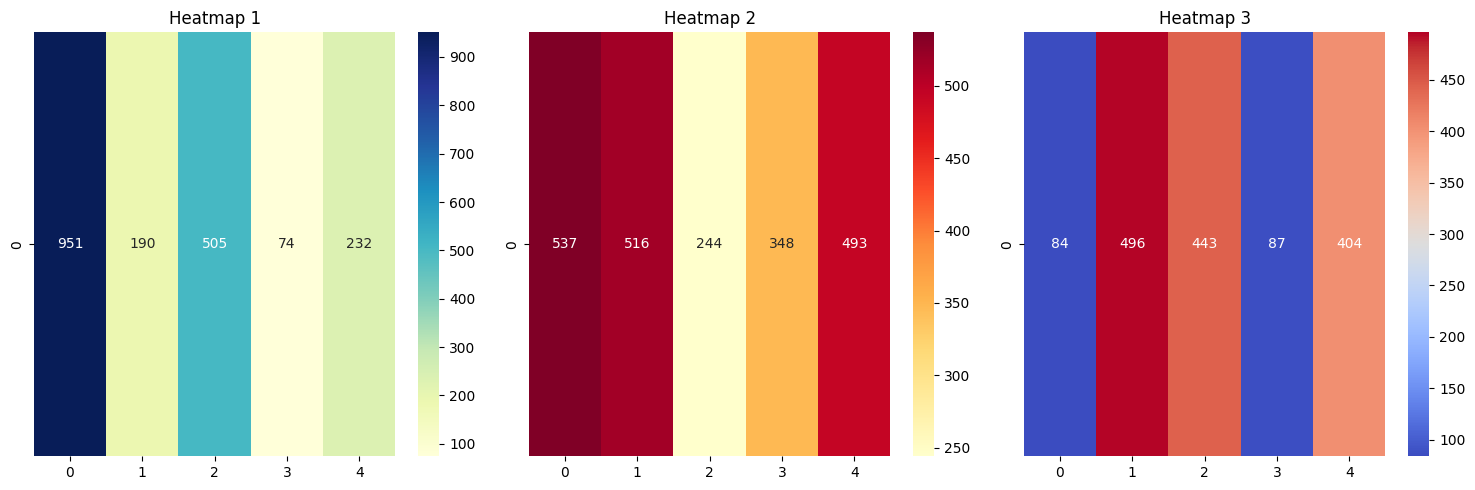

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

# 初始化 wandb

# 构造三个示例矩阵
matrix1 = np.random.randint(0, 1000, (1, 5))
matrix2 = np.random.randint(0, 1000, (1, 5))
matrix3 = np.random.randint(0, 1000, (1, 5))

# 创建画布
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 一行三列

# 第一个热力图
sns.heatmap(matrix1, ax=axes[0], annot=True, fmt="d", cmap="YlGnBu")
axes[0].set_title("Heatmap 1")

# 第二个热力图
sns.heatmap(matrix2, ax=axes[1], annot=True, fmt="d", cmap="YlOrRd")
axes[1].set_title("Heatmap 2")

# 第三个热力图
sns.heatmap(matrix3, ax=axes[2], annot=True, fmt="d", cmap="coolwarm")
axes[2].set_title("Heatmap 3")

plt.tight_layout()

plt.show()


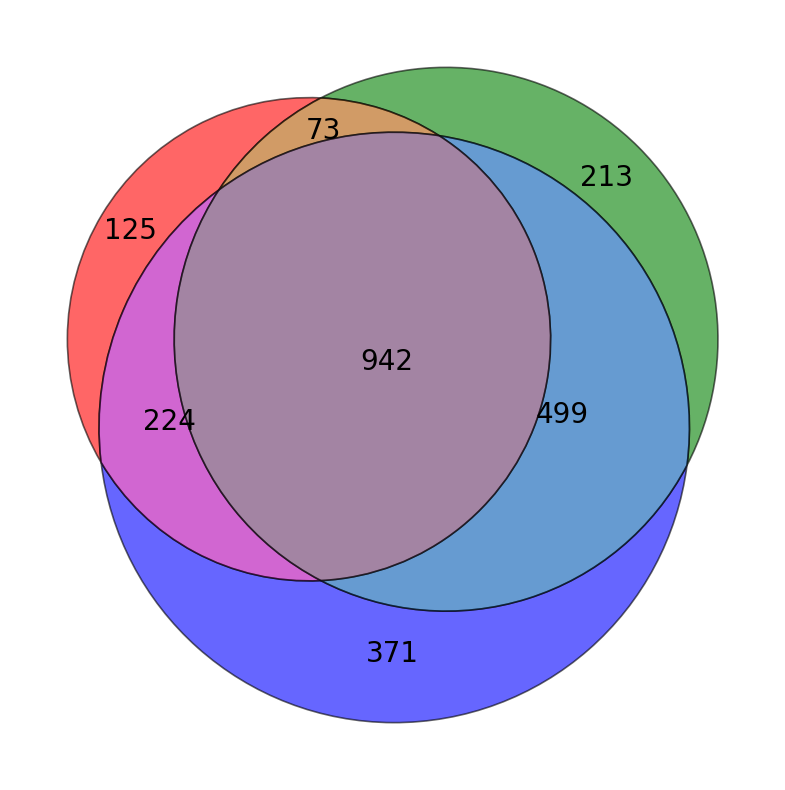

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_venn import venn3
import json
import matplotlib

# 读取布尔向量
with open('x1.txt', 'r') as f:
    A = json.load(f)
with open('x2.txt', 'r') as f:
    B = json.load(f)
with open('x3.txt', 'r') as f:
    C = json.load(f)

# 转换为集合索引
set_A = set(np.where(A)[0])
set_B = set(np.where(B)[0])
set_C = set(np.where(C)[0])

# 绘图
plt.figure(figsize=(8, 8))
v = venn3([set_A, set_B, set_C], set_labels=('', '', ''))

label_dict = {
    'A': 'Text-only',
    'B': 'Vision-only',
    'C': 'T&V'
}

# 设置字体大小
# for label_id in ['A', 'B', 'C']:
#     label_text = label_dict[label_id]
#     pos = v.get_label_by_id(label_id).get_position() + np.array([-0.05, 0.03])
    
#     plt.annotate(
#         label_text,
#         xy=pos,
#         ha='center', va='center',
#         fontsize=15,
#         color='black',
#         bbox=dict(boxstyle='round,pad=0.3', fc='#098154', alpha=0.2),
#         arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.5',color='black')
#     )
for idx, area in enumerate(['100', '001', '010']):
    if v.get_patch_by_id(area):
        v.get_patch_by_id(area).set_alpha(0.6)   # 设置透明度
        v.get_patch_by_id(area).set_edgecolor('black')  # 描边
        v.get_patch_by_id(area).set_linewidth(1.2)       # 边框粗细
# 设置区域数值的字体大小
for subset in v.subset_labels:
    if subset:
        subset.set_fontsize(20)

# 添加标题
# plt.title("集合交并关系图（Text / Vision / Both）", fontsize=16)

# 去除边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# 显示
plt.tight_layout()
plt.savefig('venn_diagram.png', dpi=1000, bbox_inches='tight')
plt.show()


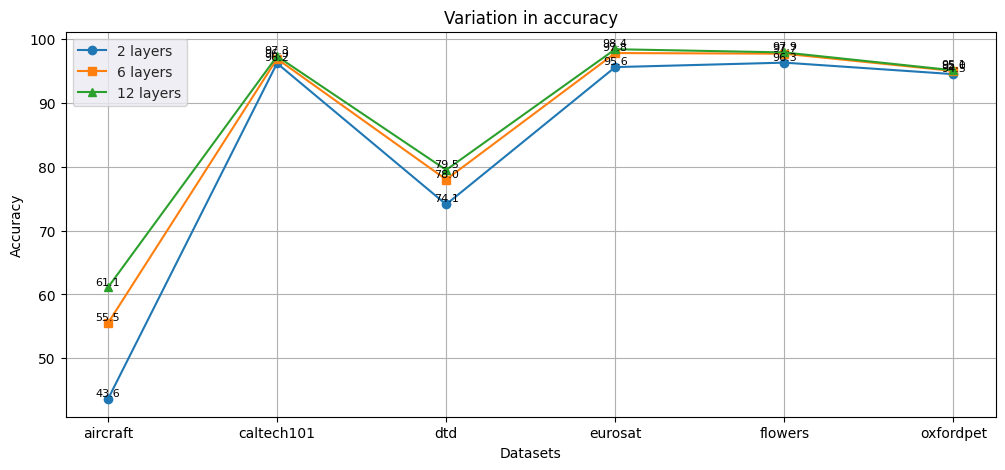

In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns

layer_2 = [43.6, 96.2, 74.1, 95.6, 96.3, 94.5]
layer_6 = [55.5, 96.9, 78.0, 97.8, 97.7, 95.0]
layer_12 = [61.1, 97.3, 79.5, 98.4, 97.9, 95.1]
datasets = ["aircraft", "caltech101", "dtd", "eurosat", "flowers", "oxfordpet"]
resume_dir = "./output/2025_5_9"
fig = plt.figure(figsize=(12, 5))
plt.plot(datasets, layer_2, label="2 layers", marker='o')
for x, y in zip(datasets, layer_2):
    if y is not None:
        plt.text(x, y + 0.4, f"{y}", ha='center', fontsize=8)
plt.plot(datasets, layer_6, label="6 layers", marker='s')
for x, y in zip(datasets, layer_6):
    if y is not None:
        plt.text(x, y + 0.4, f"{y}", ha='center', fontsize=8)
plt.plot(datasets, layer_12, label="12 layers", marker='^')
for x, y in zip(datasets, layer_12):
    if y is not None:
        plt.text(x, y + 0.4, f"{y}", ha='center', fontsize=8)

plt.grid()
sns.set_style("darkgrid")
plt.title("Variation in accuracy")
plt.xlabel("Datasets")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(os.path.join(resume_dir, "acc_layer.png"), dpi=1000)
plt.show()

In [12]:
from safetensors.torch import load_file

# 加载 safetensors 文件
file_path = "./output/The_Last_NB_EXP/router.safetensors"  # 替换为你的文件路径
tensors = load_file(file_path)

# 指定 tensor 名称
key = "base_model.model.vision_model.encoder.layers.0.self_attn.k_proj.loramoe_router.default.weight"

# 获取并打印 tensor
if key in tensors:
    tensor = tensors[key][2]
    print(tensor)             # 打印 tensor 值
    print(tensor.shape)       # 打印形状
    print(tensor.dtype)       # 打印数据类型
else:
    print(f"Tensor key '{key}' not found in the file.")


tensor([ 6.4134e-02, -2.9484e-01, -5.5515e-03, -3.6457e-02,  5.0092e-02,
         4.3926e-02,  3.2342e-01, -8.6928e-03, -5.2998e-02,  5.9056e-06,
         2.3412e-02,  2.1991e-05, -6.0966e-03, -1.5054e-02,  5.9025e-03,
         5.1178e-02, -1.4426e-04, -1.4820e-03, -3.8878e-03, -7.9951e-02,
         3.3496e-02,  4.4848e-02,  1.1713e-04, -2.8060e-02,  1.5351e-02,
         2.7857e-02,  2.2850e-02,  9.1778e-02, -2.7840e-02, -8.7223e-03,
         5.1472e-02,  2.6181e-02,  7.0299e-03, -3.5059e-04, -8.7569e-05,
        -3.3478e-02,  1.4056e-02,  5.8190e-02,  6.5471e-04,  2.3079e-03,
         9.1313e-02, -4.1602e-02,  2.4402e-02, -9.7924e-03,  5.7941e-05,
         4.1208e-02, -1.3467e-02,  1.4729e-02, -1.3970e-04,  1.0441e-03,
         6.5589e-02,  3.1813e-02,  5.6232e-01,  2.5549e-02, -4.1871e-02,
        -5.0300e-02, -1.0572e-02,  1.5941e-04, -1.7564e-02,  3.1357e-03,
        -9.8950e-05, -3.9804e-02,  3.6684e-05, -3.3868e-05, -2.4954e-01,
         2.2576e-02,  5.5350e-02, -5.7950e-03,  1.1

In [17]:
from safetensors.torch import load_file

# 加载 safetensors 文件
file_path = "./output/The_Last_NB_EXP/router.safetensors"  # 替换为你的文件路径
tensors = load_file(file_path)

# 指定 tensor 名称
key = "base_model.model.vision_model.encoder.layers.0.self_attn.q_proj.loramoe_router.default.weight"

# 获取并打印 tensor
if key in tensors:
    tensor = tensors[key][0]
    print(tensor)             # 打印 tensor 值
    print(tensor.shape)       # 打印形状
    print(tensor.dtype)       # 打印数据类型
else:
    print(f"Tensor key '{key}' not found in the file.")


tensor([ 6.4328e-02, -2.9524e-01, -5.5071e-03, -3.6199e-02,  5.0293e-02,
         4.4316e-02,  3.2480e-01, -8.7198e-03, -5.2782e-02,  5.9099e-06,
         2.3446e-02,  2.2364e-05, -6.0918e-03, -1.5169e-02,  5.9040e-03,
         5.0620e-02, -1.4368e-04, -1.4758e-03, -3.8669e-03, -7.9910e-02,
         3.3505e-02,  4.5223e-02,  1.1705e-04, -2.8173e-02,  1.5344e-02,
         2.8026e-02,  2.2923e-02,  9.0496e-02, -2.7640e-02, -8.7578e-03,
         5.1834e-02,  2.6367e-02,  6.9982e-03, -3.4945e-04, -8.7964e-05,
        -3.3361e-02,  1.4001e-02,  5.8252e-02,  6.4900e-04,  2.3171e-03,
         9.2497e-02, -4.1328e-02,  2.4451e-02, -9.8230e-03,  5.7708e-05,
         4.1613e-02, -1.3427e-02,  1.4589e-02, -1.4001e-04,  1.0336e-03,
         6.5727e-02,  3.1823e-02,  5.6061e-01,  2.5652e-02, -4.1476e-02,
        -5.0396e-02, -1.0515e-02,  1.5998e-04, -1.7567e-02,  3.1709e-03,
        -9.9418e-05, -3.9451e-02,  3.6775e-05, -3.3883e-05, -2.5117e-01,
         2.2696e-02,  5.5446e-02, -5.7850e-03,  1.1

In [18]:
from safetensors.torch import load_file

# 加载 safetensors 文件
file_path = "./output/The_Last_NB_EXP/router.safetensors"  # 替换为你的文件路径
tensors = load_file(file_path)

# 指定 tensor 名称
key = "base_model.model.vision_model.encoder.layers.0.self_attn.q_proj.loramoe_router.default.weight"

# 获取并打印 tensor
if key in tensors:
    tensor = tensors[key][2]
    print(tensor)             # 打印 tensor 值
    print(tensor.shape)       # 打印形状
    print(tensor.dtype)       # 打印数据类型
else:
    print(f"Tensor key '{key}' not found in the file.")


tensor([ 6.4084e-02, -2.9791e-01, -5.5107e-03, -3.6058e-02,  4.9979e-02,
         4.4339e-02,  3.2216e-01, -8.6451e-03, -5.2610e-02,  6.0024e-06,
         2.3251e-02,  2.2063e-05, -6.0135e-03, -1.4927e-02,  5.9068e-03,
         5.1128e-02, -1.4294e-04, -1.4778e-03, -3.8624e-03, -8.0831e-02,
         3.3724e-02,  4.5335e-02,  1.1561e-04, -2.7937e-02,  1.5282e-02,
         2.7491e-02,  2.3280e-02,  9.1772e-02, -2.8207e-02, -8.6330e-03,
         5.1186e-02,  2.6087e-02,  7.0417e-03, -3.5500e-04, -8.8173e-05,
        -3.4021e-02,  1.4210e-02,  5.8579e-02,  6.5144e-04,  2.3255e-03,
         9.1714e-02, -4.2150e-02,  2.4574e-02, -9.7429e-03,  5.6931e-05,
         4.1513e-02, -1.3462e-02,  1.4683e-02, -1.3949e-04,  1.0421e-03,
         6.4861e-02,  3.1980e-02,  5.6897e-01,  2.5409e-02, -4.2400e-02,
        -4.9869e-02, -1.0650e-02,  1.5815e-04, -1.7614e-02,  3.1168e-03,
        -9.8813e-05, -3.9500e-02,  3.6845e-05, -3.3153e-05, -2.4900e-01,
         2.2490e-02,  5.5429e-02, -5.8615e-03,  1.1